In [1]:
import os
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.datasets import fetch_openml, load_digits 
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics.pairwise import euclidean_distances

In [2]:
os.chdir("C:\\Users\\melis\\Documents\\DSC-540 Machine Learning")
data = pd.read_csv('mnist_test.csv')
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
train = pd.read_csv('mnist_train.csv')
train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train_img = np.array(data)
train_target = np.array(data)

X = train_img
y = train_target

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5)

In [6]:
pd.crosstab(index=train['label'], columns='count')

col_0,count
label,
0,5923
1,6742
2,5958
3,6131
4,5842
5,5421
6,5918
7,6265
8,5851


Text(0, 0.5, 'Count')

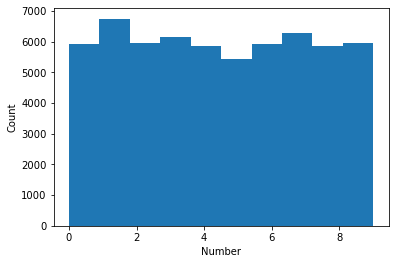

In [7]:
plt.hist(train["label"])
plt.xlabel("Number") 
plt.ylabel("Count")

In [7]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5000, 785) (5000, 785)
(5000, 785) (5000, 785)


In [8]:
euclidean_distances(X_train,y_train)

array([[   0.        , 2495.4238117 , 2451.68105593, ..., 2533.57849691,
        2690.634126  , 2467.2930511 ],
       [2495.4238117 ,    0.        , 2645.07391201, ..., 2814.11158272,
        2580.70804238, 2049.1293273 ],
       [2451.68105593, 2645.07391201,    0.        , ..., 2192.71475573,
        2060.94541412, 2564.44945359],
       ...,
       [2533.57849691, 2814.11158272, 2192.71475573, ...,    0.        ,
        2562.71106448, 2423.56328574],
       [2690.634126  , 2580.70804238, 2060.94541412, ..., 2562.71106448,
           0.        , 2583.48427516],
       [2467.2930511 , 2049.1293273 , 2564.44945359, ..., 2423.56328574,
        2583.48427516,    0.        ]])

In [9]:
class KNN:
    def __init__(self, K=3):
        self.K = K

In [10]:
class KNN:
    def __init__(self, K=3):
        self.K = K
    def fit(self, x_train, y_train):
        self.X_train = x_train
        self.Y_train = y_train

In [11]:
def predict(self, X_test):
    predictions = [] 
    for i in range(len(X_test)):
        dist = np.array([euc_dist(X_test[i], x_t) for x_t in   
        self.X_train])
        dist_sorted = dist.argsort()[:self.K]
        neigh_count = {}
        for idx in dist_sorted:
            if self.Y_train[idx] in neigh_count:
                neigh_count[self.Y_train[idx]] += 1
            else:
                neigh_count[self.Y_train[idx]] = 1
        sorted_neigh_count = sorted(neigh_count.items(),    
        key=operator.itemgetter(1), reverse=True)
        predictions.append(sorted_neigh_count[0][0]) 
    return predictions

In [12]:
from sklearn.datasets import load_digits
mnist = load_digits()
print(mnist.data.shape)

(1797, 64)


In [13]:
X = mnist.data 
y = mnist.target

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)


In [15]:
kVals = np.arange(3,60,2)
accuracies = []
for k in kVals:
  model = KNeighborsClassifier(n_neighbors = k)
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  acc = accuracy_score(y_test, pred)
  accuracies.append(acc)
  print("K = "+str(k)+"; Accuracy: "+str(acc))

K = 3; Accuracy: 0.9777777777777777
K = 5; Accuracy: 0.9755555555555555
K = 7; Accuracy: 0.9755555555555555
K = 9; Accuracy: 0.9755555555555555
K = 11; Accuracy: 0.9711111111111111
K = 13; Accuracy: 0.9688888888888889
K = 15; Accuracy: 0.9666666666666667
K = 17; Accuracy: 0.9666666666666667
K = 19; Accuracy: 0.9644444444444444
K = 21; Accuracy: 0.9666666666666667
K = 23; Accuracy: 0.9644444444444444
K = 25; Accuracy: 0.9644444444444444
K = 27; Accuracy: 0.9666666666666667
K = 29; Accuracy: 0.96
K = 31; Accuracy: 0.96
K = 33; Accuracy: 0.96
K = 35; Accuracy: 0.9577777777777777
K = 37; Accuracy: 0.9577777777777777
K = 39; Accuracy: 0.9577777777777777
K = 41; Accuracy: 0.9533333333333334
K = 43; Accuracy: 0.9511111111111111
K = 45; Accuracy: 0.9488888888888889
K = 47; Accuracy: 0.9444444444444444
K = 49; Accuracy: 0.94
K = 51; Accuracy: 0.9355555555555556
K = 53; Accuracy: 0.9355555555555556
K = 55; Accuracy: 0.9333333333333333
K = 57; Accuracy: 0.9333333333333333
K = 59; Accuracy: 0.9288

Text(0, 0.5, 'Accuracy')

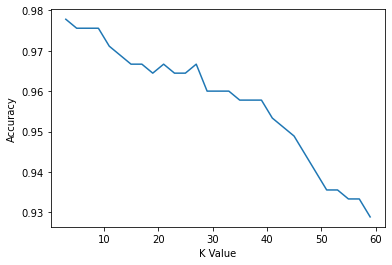

In [16]:
plt.plot(kVals, accuracies)
plt.xlabel("K Value") 
plt.ylabel("Accuracy")

In [4]:
X3_train = train.iloc[:, 2:784].values
Y3_train = train.iloc[:, :-784].values


X3_test = data.iloc[:, 2:784].values
Y3_test = data.iloc[:, :-784].values



In [5]:
classifier3 = KNeighborsClassifier(n_neighbors=3)
classifier3.fit(X3_train, Y3_train)

<ipython-input-5-a9197e567ed8>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  classifier3.fit(X3_train, Y3_train)


KNeighborsClassifier(n_neighbors=3)

In [10]:
Pred3 = classifier3.predict(X3_test)


In [11]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(Y3_test, Pred3))
print(classification_report(Y3_test, Pred3))

[[ 974    1    1    0    0    1    2    1    0    0]
 [   0 1133    2    0    0    0    0    0    0    0]
 [  10    9  996    2    0    0    0   13    2    0]
 [   0    2    4  976    1   13    1    7    3    3]
 [   1    6    0    0  950    0    4    2    0   19]
 [   6    1    0   11    2  859    5    1    3    4]
 [   5    3    0    0    3    3  944    0    0    0]
 [   0   21    5    0    1    0    0  991    0   10]
 [   8    2    4   16    8   11    3    4  914    4]
 [   4    5    2    8    9    2    1    8    2  968]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.96      1.00      0.98      1135
           2       0.98      0.97      0.97      1032
           3       0.96      0.97      0.96      1010
           4       0.98      0.97      0.97       982
           5       0.97      0.96      0.96       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96   

In [8]:
pred_prob2 = classifier3.predict_proba(X3_test)

In [9]:
from sklearn.metrics import roc_curve

In [10]:
fpr2, tpr2, thresh2 = roc_curve(Y3_test, pred_prob2[:,1], pos_label=1)

In [13]:
random_probs = [0 for i in range(len(Y3_test))]
p_fpr, p_tpr, _ = roc_curve(Y3_test, random_probs, pos_label=1)

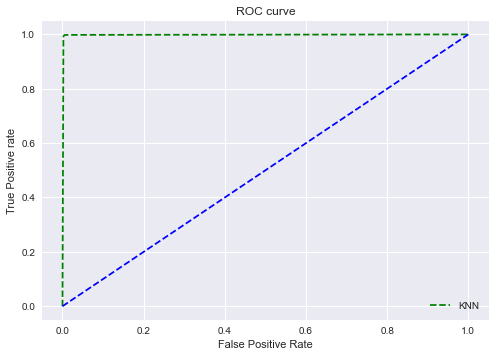

In [16]:
plt.style.use('seaborn')

plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();